In [102]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib as mpl
import seaborn as sns
import re
import os
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.linewidth'] = 2
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

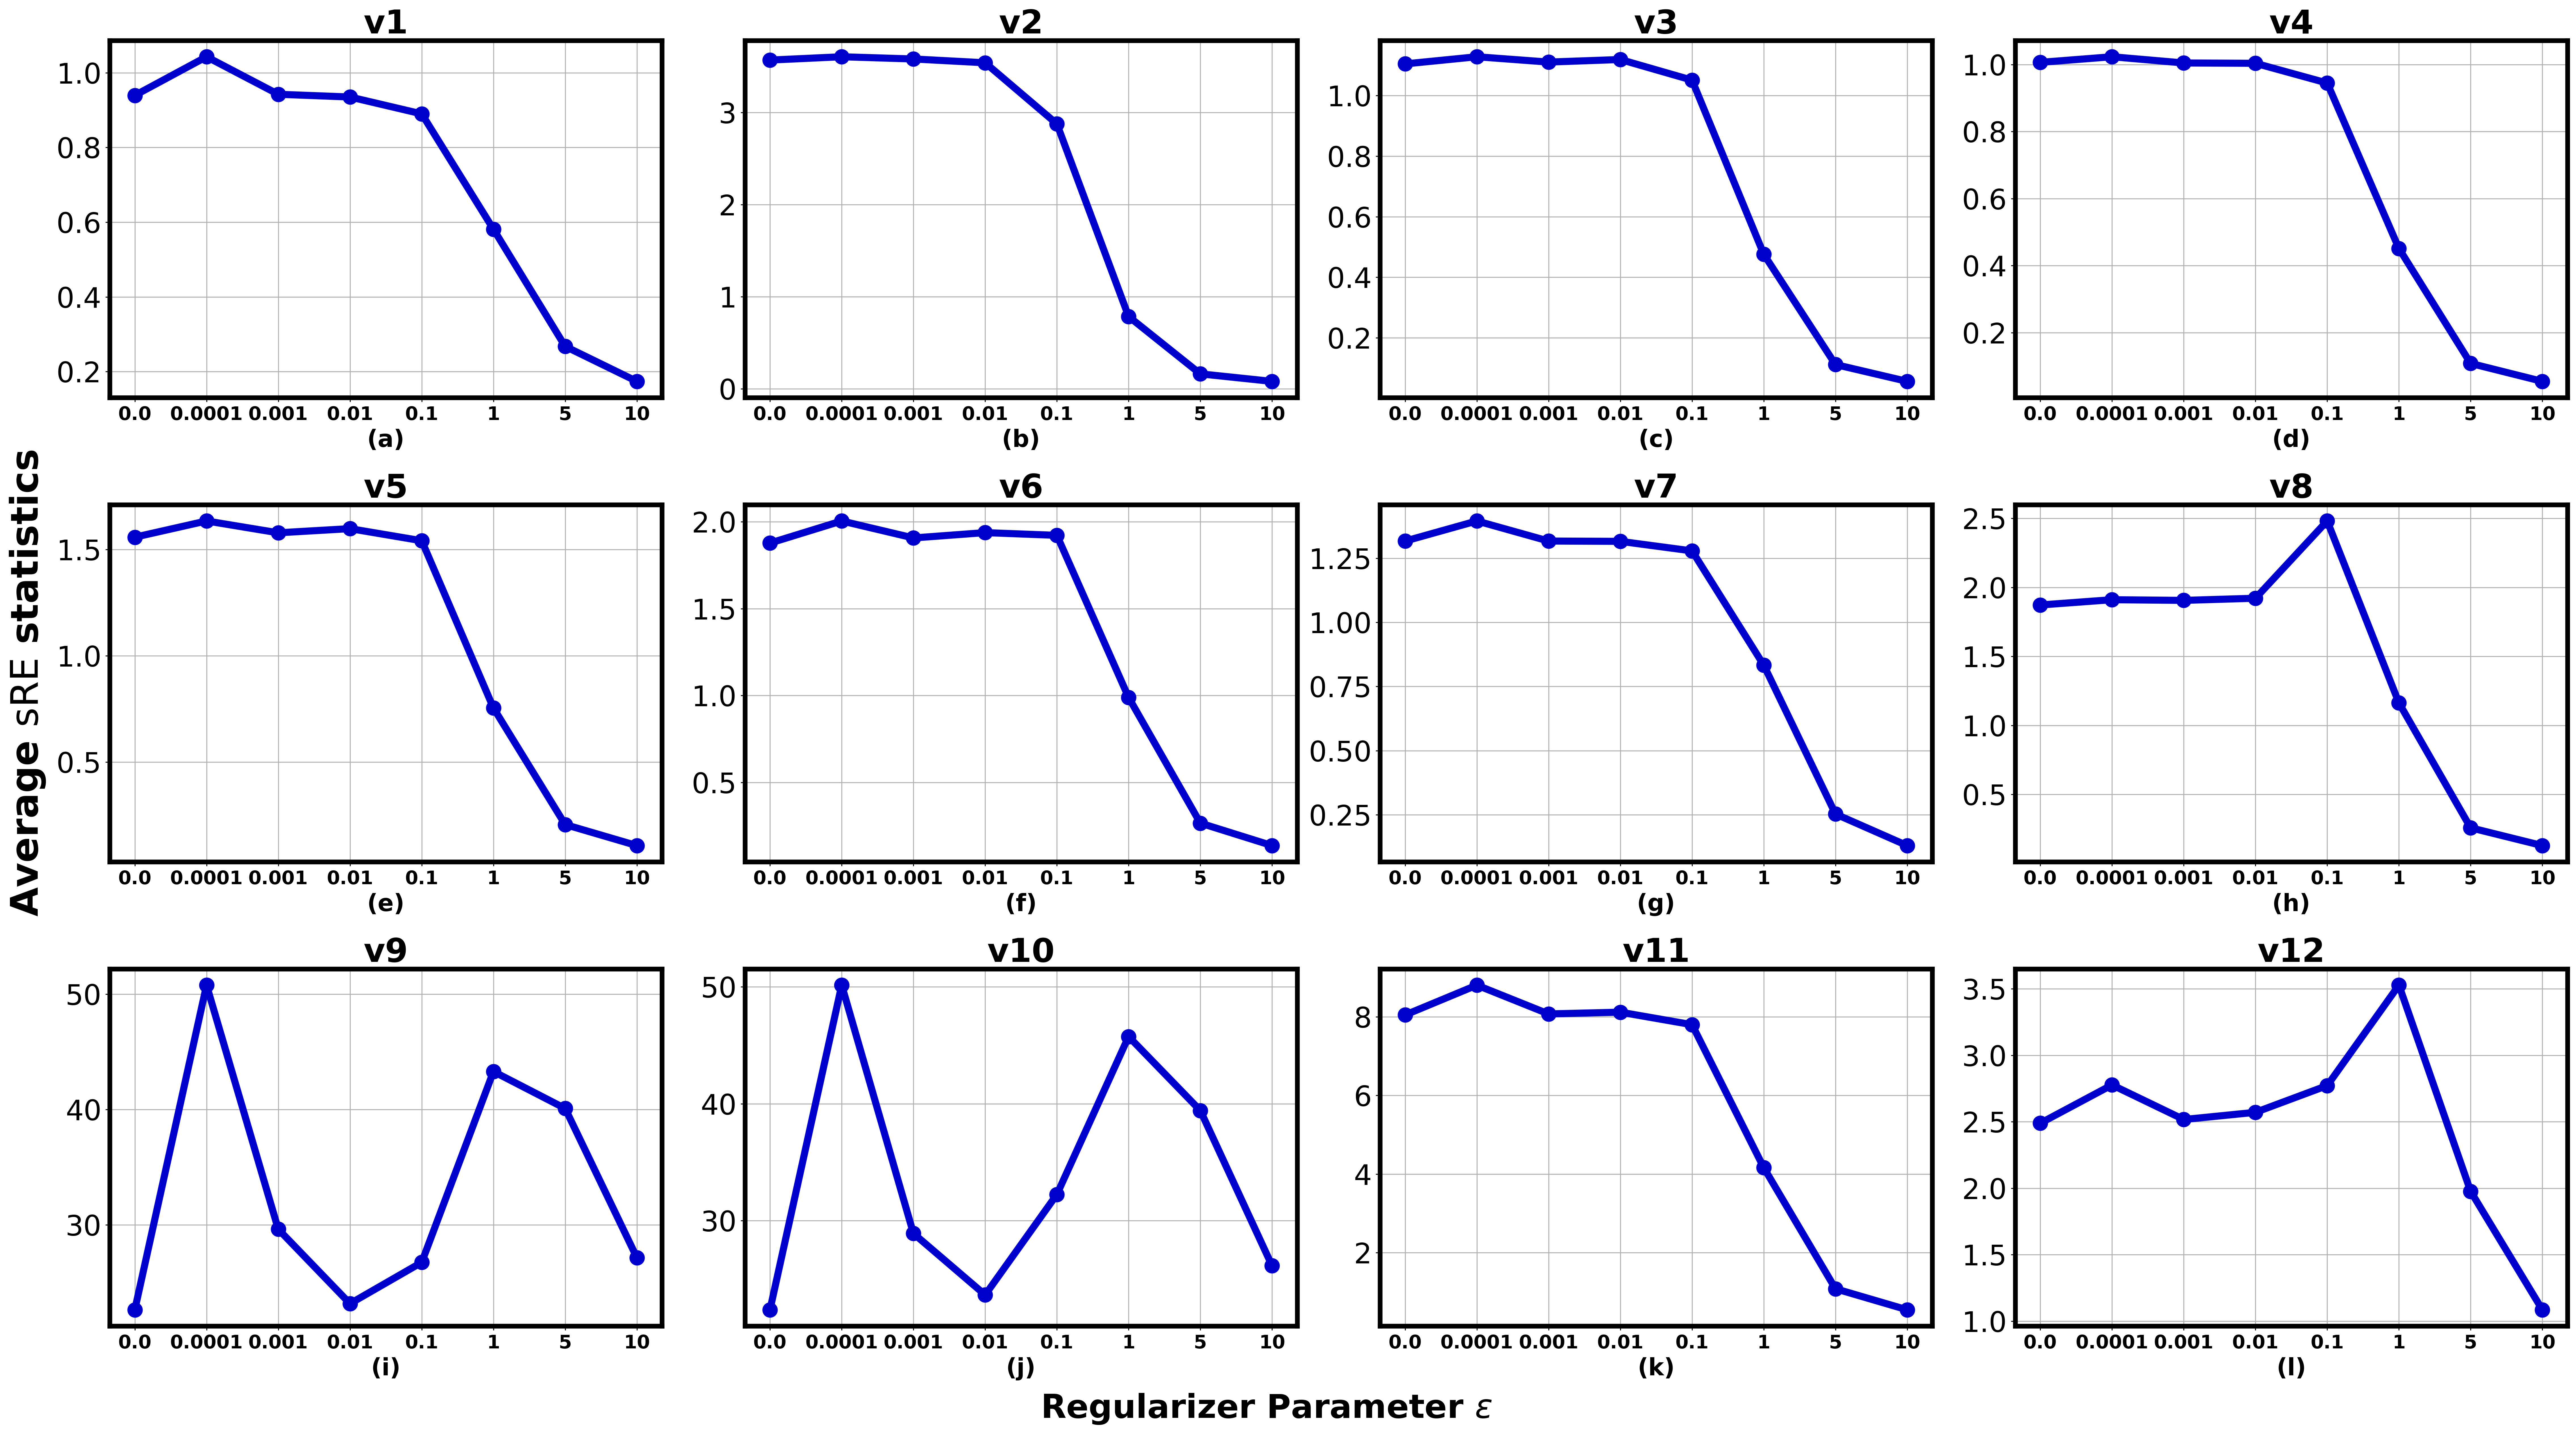

In [179]:
with open('prof_0_500_all_dists_sRE.pkl', 'rb') as f:
    rank_energy = pickle.load(f)
    
mean_RE = pd.DataFrame()
std_RE = pd.DataFrame()
mean_Rmmd = pd.DataFrame()
std_Rmmd = pd.DataFrame()
for key in rank_energy.keys():
    mean_RE[key] = rank_energy[key].astype('float64').filter(regex = 'sRE').mean()
    std_RE[key] = rank_energy[key].astype('float64').filter(regex = 'sRE').std()
    mean_Rmmd[key] = rank_energy[key].astype('float64').filter(regex = 'sRE').mean()
    std_Rmmd[key] = rank_energy[key].astype('float64').filter(regex = 'sRE').std()
    
ncol = 4
nrow = 3
reg_list = [0.0, 1e-4, 0.001, 0.01, 0.1,1, 5, 10]
fig, axs = plt.subplots(nrow, ncol, figsize = (34,18))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=.30, wspace=.15)
mpl.rcParams['axes.linewidth'] = 4
fig_name = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']
for i in range(nrow):
    for j in range(ncol):
        col = mean_RE.columns[i  * ncol + j]
        axs[i, j].plot(np.arange(8), mean_RE[col], 'go',ls='-', linewidth = 6, ms=12, color = 'mediumblue', label = "Rank Energy")
        axs[i, j].set_title(col,  fontsize=28, fontweight='bold')

        plt.sca(axs[i, j])
        plt.xticks( [0, 1, 2, 3, 4, 5, 6, 7], reg_list, fontsize = 14, fontweight='bold')
        axs[i, j].xaxis.set_tick_params(labelsize=16)
        axs[i, j].yaxis.set_tick_params(labelsize=24)
        axs[i, j].set_xlabel(fig_name[i*ncol+j], fontsize=20, fontweight = 'bold')
        plt.grid(True)
fig.text(0.5, 0.02, 'Regularizer Parameter $\epsilon$', ha='center', fontsize = 28, fontweight='bold')
fig.text(0.065, 0.5, 'Average $\mathsf{sRE}$ statistics', va='center', rotation='vertical',  fontsize = 32, fontweight='bold')
plt.savefig('new_500_200_3_scaled')

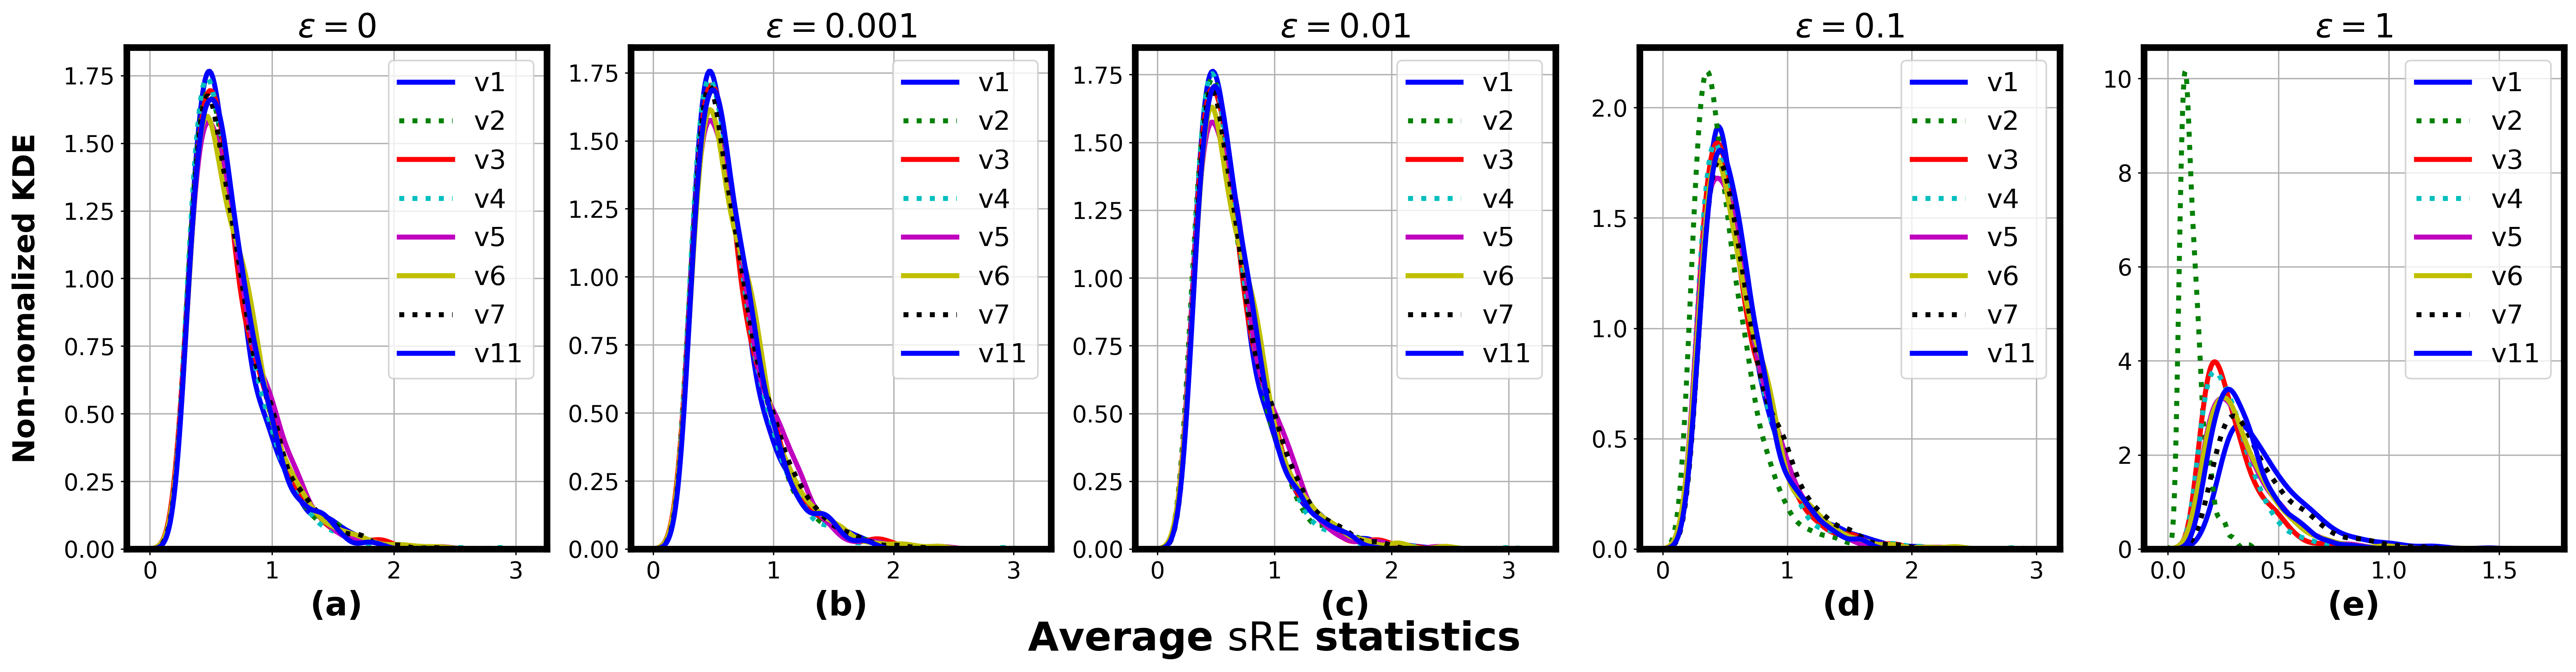

In [215]:
with open('0_1000_prof_null_stats.pkl', 'rb') as f:
    null_dist = pickle.load(f)
    
reg_RE = ['0sRE', '0.001sRE', '0.01sRE', '0.1sRE', '1sRE']
nrow = 1
ncol = 5
fig, axs = plt.subplots(nrow, ncol, figsize = (24,5))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=.4, wspace=.2)
params = {'legend.fontsize': 16,
          'legend.handlelength': 2}
plt.rcParams.update(params)
fig_name = ['(a)', '(b)', '(c)', '(d)', '(e)']
for j in range(nrow):
        for i in range(len(reg_RE)):
            reg = reg_RE[i]
            x = re.findall('[0.0-9]+', reg)[0]
            sns.kdeplot(data=null_dist['v1'].astype('float64'), x = reg, color= 'blue',linestyle ='-', linewidth = 3, label ='v1',ax = axs[i])
            sns.kdeplot(data=null_dist['v2'].astype('float64'), x = reg, color= 'g',linestyle =':', linewidth = 3, label ='v2',ax = axs[i])
            sns.kdeplot(data=null_dist['v3'].astype('float64'), x = reg, color= 'r',linestyle ='-', linewidth = 3, label ='v3',ax = axs[i])
            sns.kdeplot(data=null_dist['v4'].astype('float64'), x = reg, color= 'c',linestyle =':', linewidth = 3, label ='v4',ax = axs[i])
            sns.kdeplot(data=null_dist['v5'].astype('float64'), x = reg, color= 'm',linestyle ='-', linewidth = 3, label ='v5',ax = axs[i])
            sns.kdeplot(data=null_dist['v6'].astype('float64'), x = reg, color= 'y',linestyle ='-', linewidth = 3, label ='v6',ax = axs[i])
            sns.kdeplot(data=null_dist['v7'].astype('float64'), x = reg, color= 'k',linestyle =':', linewidth = 3, label ='v7',ax = axs[i])
            sns.kdeplot(data=null_dist['v11'].astype('float64'),x = reg, color= 'b',linestyle ='-', linewidth = 3, label ='v11',ax = axs[i])
            axs[i].set_xlabel(fig_name[i], fontsize=20, fontweight = 'bold')
            axs[i].set_title('$\epsilon = $' + x, fontsize = 20 )
            axs[i].yaxis.set_tick_params(labelsize=14)
            axs[i].xaxis.set_tick_params(labelsize=14)
            axs[i].set(ylabel = None)
            axs[i].legend(prop={'size': 20})
            axs[i].legend()
            axs[i].grid(True)
fig.text(0.5, -0.09, 'Average $\mathsf{sRE}$ statistics', ha='center', fontsize =24, fontweight='bold')
fig.text(0.06, 0.5, 'Non-nomalized KDE', va='center', rotation='vertical',  fontsize = 18, fontweight='bold')
plt.savefig('new_prof_null')

In [189]:
with open('0_500_prof_dim_stats.pkl', 'rb') as f:
    rank_eng_dim = pickle.load(f)
mean_RE_dim = pd.DataFrame()
std_RE_dim = pd.DataFrame()
for key in rank_eng_dim.keys():
    mean_RE_dim[key] = rank_eng_dim[key].filter(regex = 'sRE').mean()
    std_RE_dim[key] = rank_eng_dim[key].filter(regex = 'sRE').std()
      
mean_RE = pd.DataFrame()
std_RE = pd.DataFrame()

for key in rank_energy.keys():
    mean_RE[key] = rank_energy[key].filter(regex = 'sRE').mean()
    std_RE[key] = rank_energy[key].filter(regex = 'sRE').std()

In [191]:
sample_type = ['v1', 'v2', 'v3', 'v5', 'v6', 'v9', 'v11', 'v12']
idx = 0
for sample in sample_type:
    mean_RE_dim.insert(idx, column = (sample, 3), value = mean_RE[sample])
    idx +=6

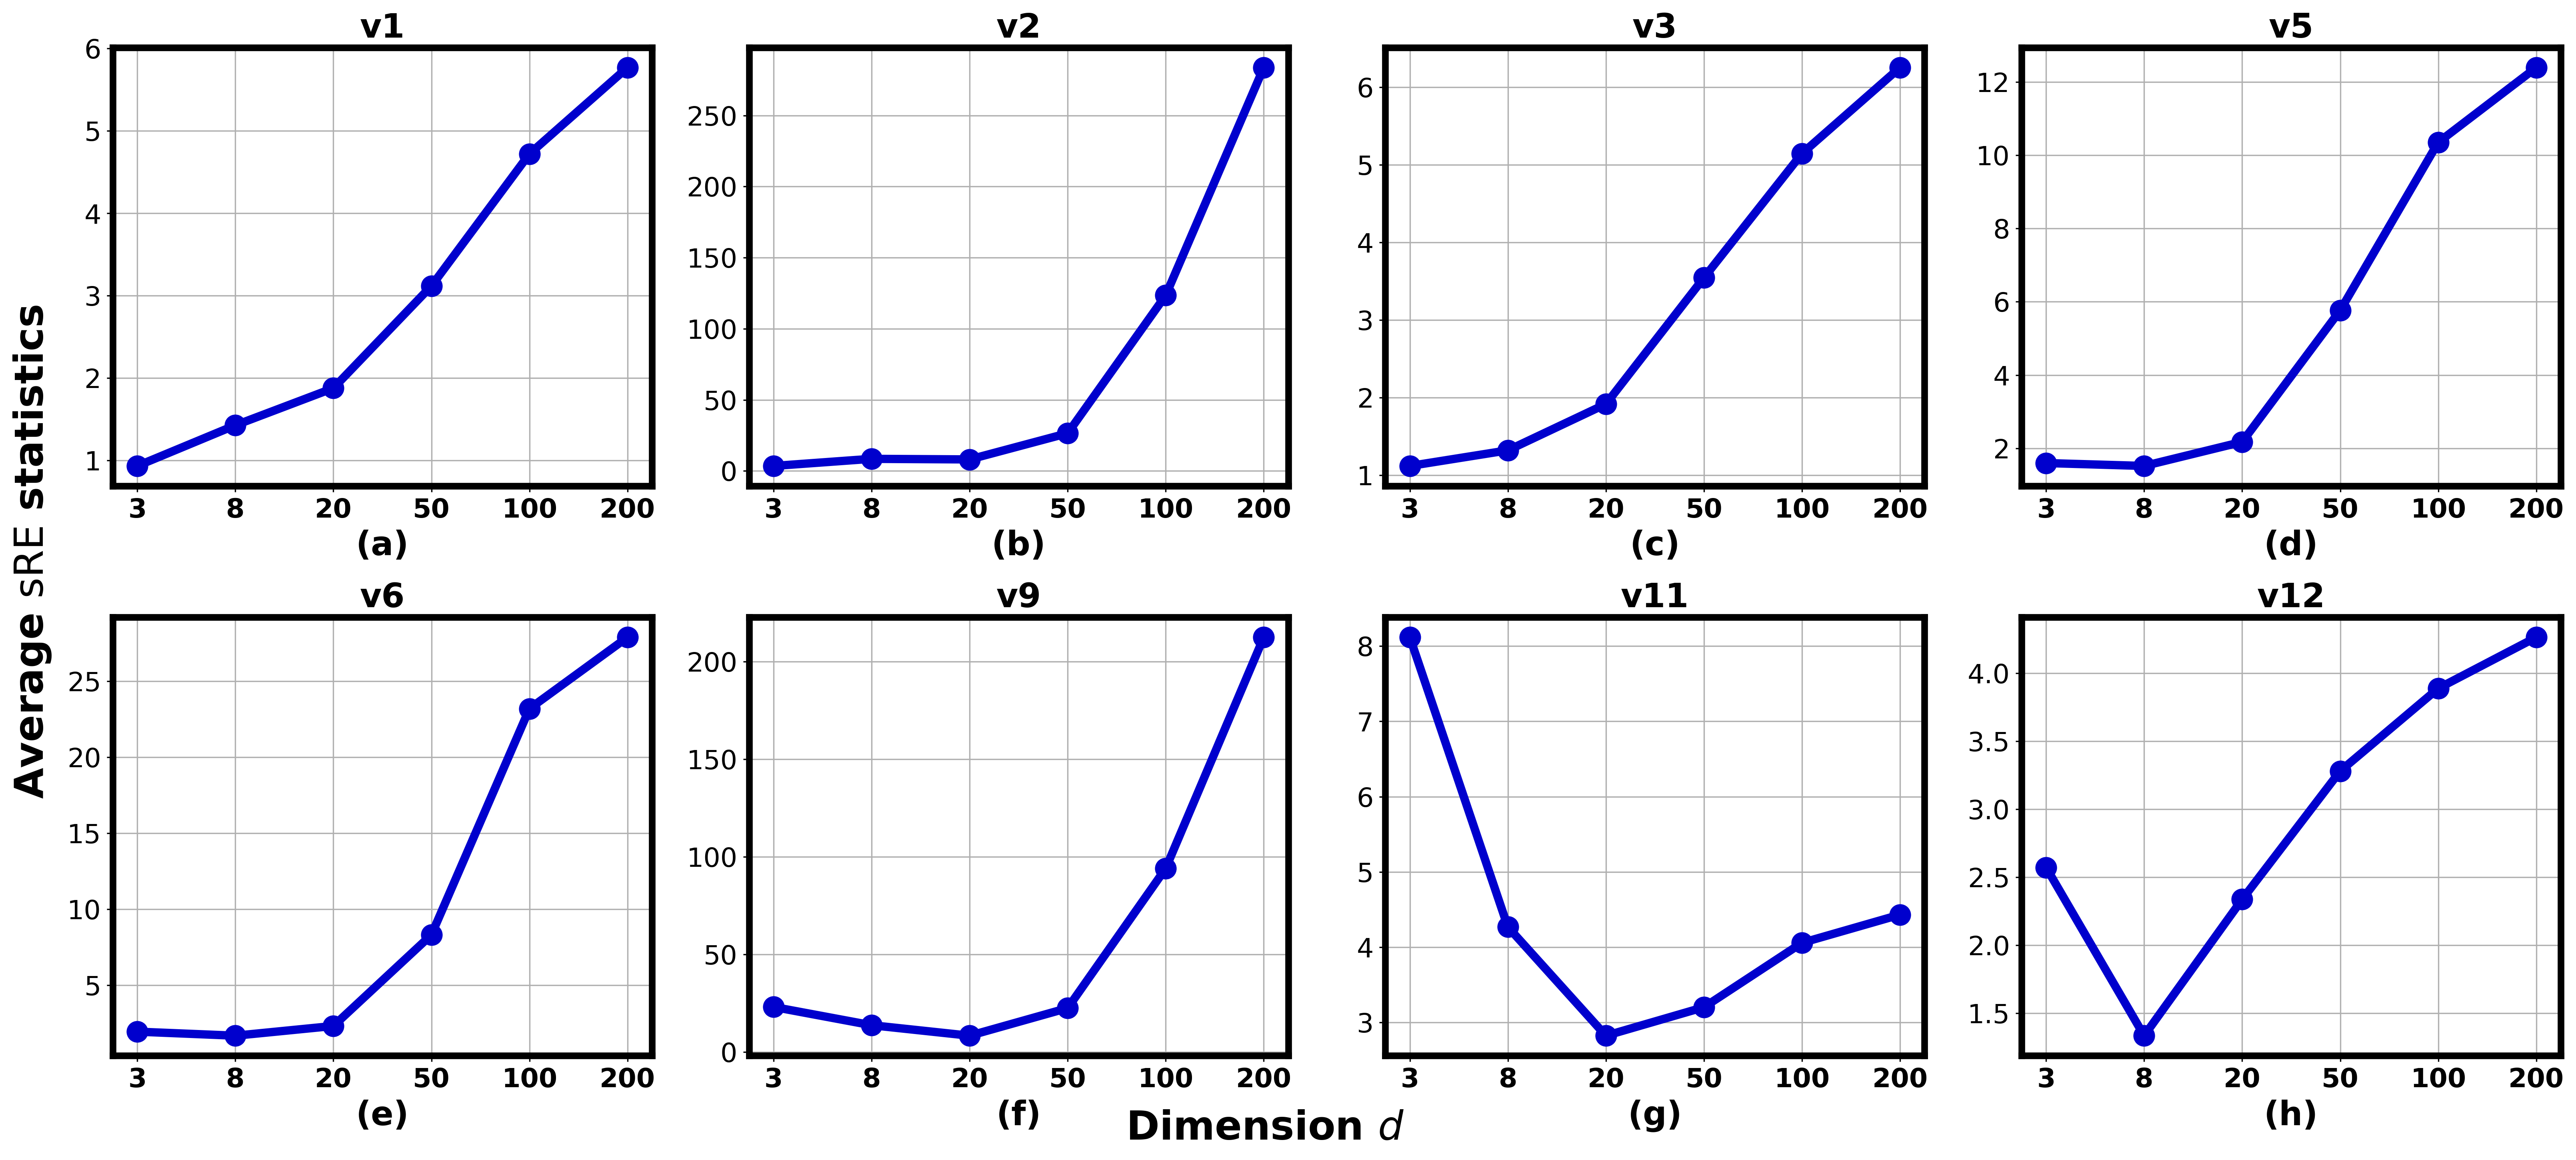

In [196]:
ncol = 4
nrow = 2
fig, axs = plt.subplots(nrow, ncol, figsize = (24,10))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=.3, wspace=.18)
dim_list = [3, 8, 20, 50, 100, 200]
m =  0
fig_name = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
for i in range(nrow):
    for j in range(ncol):
        v = sample_type[i  * ncol + j]
        axs[i, j].plot(np.arange(6), mean_RE_dim.iloc[0, m * 6: m *6 + 6 ], 'go', ls='-', linewidth = 5, ms=12, color = 'mediumblue',
                       label = 'RE: reg = ' + str(0.01))
        axs[i, j].set_title(v,  fontsize=20, fontweight = 'bold')
        plt.sca(axs[i, j])
        
        m+=1
        plt.xticks( [0, 1, 2, 3, 4, 5], dim_list, fontsize = 14, fontweight='bold')
        axs[i, j].xaxis.set_tick_params(labelsize=16)
        axs[i, j].yaxis.set_tick_params(labelsize=16)
        axs[i, j].set_xlabel(fig_name[i*ncol+j], fontsize=20, fontweight = 'bold')
        plt.grid(True)
fig.text(0.5, 0.01, 'Dimension $d$', ha='center', fontsize = 24, fontweight='bold')
fig.text(0.065, 0.5, 'Average $\mathsf{sRE}$ statistics', va='center', rotation='vertical',  fontsize = 24, fontweight='bold')
plt.savefig('new_prof_dim')

In [74]:
import pickle
with open('40_200_100_8_pRE.pkl', 'rb') as f:
    projected = pickle.load(f)
del projected[('cauchy_diff', 100)]
del projected[('cauchy', 100)]

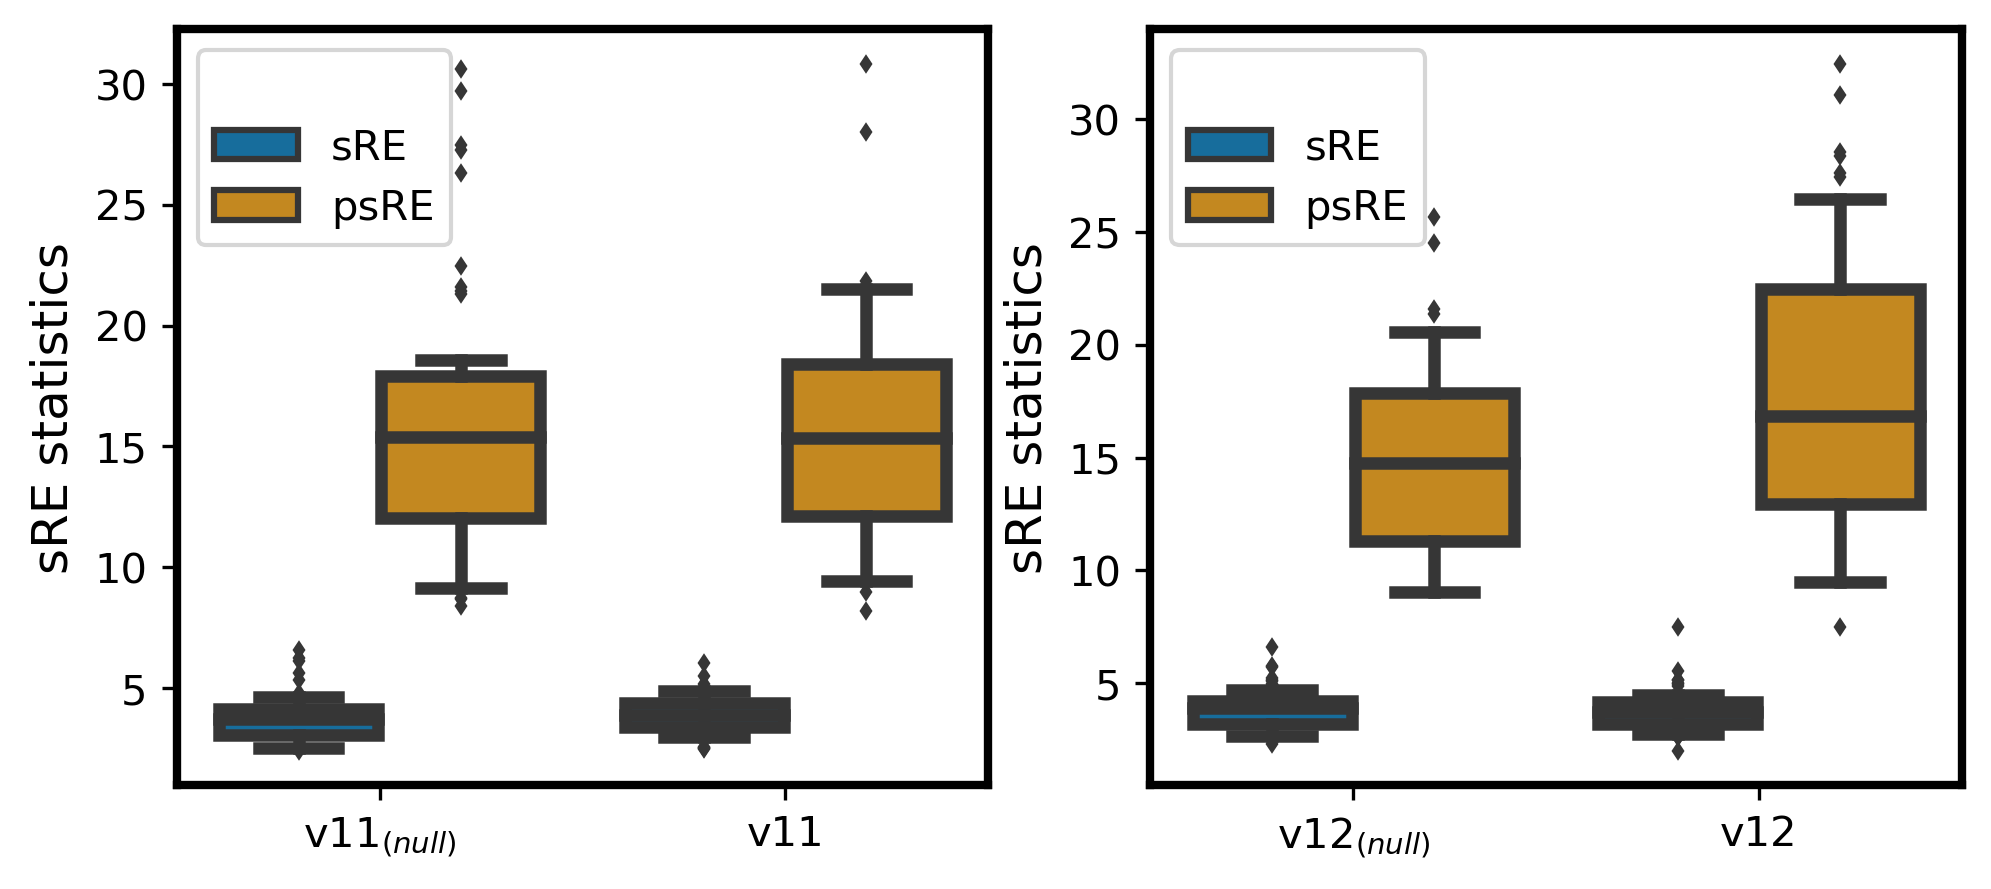

In [105]:
v11_null = projected[('v1', 100)].assign(Location = 'v$11_{(null)}$')
v11 = projected[('v2', 100)].assign(Location = 'v11')
v12 = projected[('v3', 100)].assign(Location = 'v12')
v12_null = projected[('v4', 100)].assign(Location = 'v$12_{(null)}$')
nrow = 1
ncol = 2
samples = [v11_null, v11, v12_null, v12]
fig, axs = plt.subplots(nrow, ncol, figsize = (7,3))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=.2, wspace=.2)
m = 0
for i in range(ncol):
    V = pd.concat([ samples[i + m], samples[i + m + 1]])
    mdf = pd.melt(V, id_vars=['Location'], var_name=[' '])
    sns.boxplot(x="Location", y="value", hue=" ", data=mdf, palette="colorblind",
                fliersize=2,whis = 0.5, linewidth = 3, ax=axs[i])
    axs[i].set_ylabel('sRE statistics',  fontsize= 12)
    axs[i].set_xlabel('',  fontsize=20)
    m +=1
plt.savefig('PsRE_to_8_from_100')